# **Data Cleaning, Formatting and Standardization:**

## **Import Used Libraries and Modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Export Target Dataframe (bayut_egypt.csv):**

In [2]:
df = pd.read_csv('Dataset/bayut_egypt.csv')

## **Create A Copy of the Main Dataframe (df_copy):**

In [3]:
df_copy = df.copy()

In [4]:
len(df_copy)

12384

## **1. Data Inspection:**

In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Real_Estate_Type  12384 non-null  object
 1   Location          12384 non-null  object
 2   Price             12384 non-null  object
 3   Down_Payment      5942 non-null   object
 4   Currency          12384 non-null  object
 5   Bedrooms_Number   12384 non-null  object
 6   Bathrooms_Number  12384 non-null  int64 
 7   Area              12384 non-null  object
 8   Description       12384 non-null  object
dtypes: int64(1), object(8)
memory usage: 870.9+ KB


In [6]:
df_copy.head()

,Real_Estate_Type,Location,Price,Down_Payment,Currency,Bedrooms_Number,Bathrooms_Number,Area,Description
0,Apartment,"Sodic East, New Heliopolis, Cairo","28,595,000","Down payment: EGP 2,859,500",EGP,3,3,223 Sq. M.,A fully finished private penthouse for sale in...
1,Apartment,"Shorouk City, Cairo","4,200,000","Down payment: EGP 420,000",EGP,3,2,150 Sq. M.,"Apartment for sale: 150 sqm, three bedrooms, a..."
2,Apartment,"Beit Al Watan, 5th Settlement, New Cairo, Cairo","6,880,000",NaN,EGP,3,3,255 Sq. M.,"""Choose calmness as a lifestyle and treat your..."
3,Apartment,"Mountain View iCity Compound, 5th Settlement, ...","9,000,000",NaN,EGP,3,4,225 Sq. M.,225 m² with a garden at a special price in the...
4,Apartment,"Galleria Moon Valley Compound, 5th Settlement,...","15,200,000","Down payment: EGP 1,520,000",EGP,3,3,161 Sq. M.,Apartment Panorama Ready to move 10% dp over 5...


## **2. Data Cleaning and Formatting (Standardization):**

### **2.1. Standardize Column Names to Lowercase:**

In [7]:
df_copy.columns = df_copy.columns.str.lower().str.strip()

In [8]:
list(df_copy.columns)

['real_estate_type',
 'location',
 'price',
 'down_payment',
 'currency',
 'bedrooms_number',
 'bathrooms_number',
 'area',
 'description']

### **2.2. Delete Columns (currency - description) As They Do Not Benefit In Analysis:**

In [9]:
df_copy.drop(
    columns=['currency', 'description'],
    inplace=True
)

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   real_estate_type  12384 non-null  object
 1   location          12384 non-null  object
 2   price             12384 non-null  object
 3   down_payment      5942 non-null   object
 4   bedrooms_number   12384 non-null  object
 5   bathrooms_number  12384 non-null  int64 
 6   area              12384 non-null  object
dtypes: int64(1), object(6)
memory usage: 677.4+ KB


### **2.3. Ensure the Area is Consistent in "Sq. M" (Area Column Standarization):**

In [11]:
print(df_copy['area'].str.contains('Sq. FT.').unique()) # [False]
print(df_copy['area'].str.contains('Sq. Ft.').unique()) # [False]

[False]
[False]


### **2.4. Dealing With Duplicated Values:**

In [12]:
int(df_copy.duplicated().sum()) # 4372

4372

In [13]:
duplicated_rows = df_copy[df_copy.duplicated(
    ['real_estate_type', 'location','price', 'bedrooms_number', 'bathrooms_number','area'],
    keep=False
) == True].sort_values(
    ['real_estate_type', 'location','price', 'bedrooms_number', 'bathrooms_number','area'],
    ascending=True
)

In [14]:
duplicated_rows

,real_estate_type,location,price,down_payment,bedrooms_number,bathrooms_number,area
1267,Apartment,"1st District, 5th Settlement, New Cairo, Cairo","9,000,000",NaN,3,2,225 Sq. M.
1339,Apartment,"1st District, 5th Settlement, New Cairo, Cairo","9,000,000",NaN,3,2,225 Sq. M.
11512,Apartment,"1st Settlement, New Cairo, Cairo","4,650,000",NaN,3,2,155 Sq. M.
11543,Apartment,"1st Settlement, New Cairo, Cairo","4,650,000",NaN,3,2,155 Sq. M.
11896,Apartment,"1st Settlement, New Cairo, Cairo","4,650,000",NaN,3,2,155 Sq. M.
...,...,...,...,...,...,...,...
6180,Apartment,"Zizinia El Mostakbal, Mostakbal City, Cairo","5,581,440","Down payment: EGP 558,144",2,2,144 Sq. M.
3126,Apartment,"Zizinia El Mostakbal, Mostakbal City, Cairo","6,300,000",0% Down Payment,3,3,176 Sq. M.
3313,Apartment,"Zizinia El Mostakbal, Mostakbal City, Cairo","6,300,000",0% Down Payment,3,3,176 Sq. M.
6040,Apartment,"Zizinia El Mostakbal, Mostakbal City, Cairo","6,950,000","Down payment: EGP 695,000",3,3,180 Sq. M.


**We will remove all duplicated values but, with keeping the first occurrence values.**


In [15]:
df_copy = df_copy.drop_duplicates(
    subset=['real_estate_type', 'location','price', 'bedrooms_number', 'bathrooms_number','area'],
    keep='first'
)

In [16]:
duplicated_rows = df_copy[df_copy.duplicated(
    ['real_estate_type', 'location','price', 'bedrooms_number', 'bathrooms_number','area'],
    keep=False
) == True].sort_values(
    ['real_estate_type', 'location','price', 'bedrooms_number', 'bathrooms_number','area'],
    ascending=True
)

len(duplicated_rows) # 0

0

In [17]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7825 entries, 0 to 12383
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   real_estate_type  7825 non-null   object
 1   location          7825 non-null   object
 2   price             7825 non-null   object
 3   down_payment      3758 non-null   object
 4   bedrooms_number   7825 non-null   object
 5   bathrooms_number  7825 non-null   int64 
 6   area              7825 non-null   object
dtypes: int64(1), object(6)
memory usage: 489.1+ KB


In [18]:
len(df_copy)

7825

### **2.5. Columns Data Type Casting:**

**2.5.1. Convert "price" Column Data Type From Object to Float:**

In [19]:
df_copy['price'] = df_copy['price'].str.replace(',', '').astype('float')

**2.5.2. Convert "bedrooms_number" Column Data Type From Object to Integer:**

**Data Cleaning Note: Normalizing "bedrooms_number" Column:**

Before converting the column "bedrooms_number" from object to integer, we shoud normalize the "Studio" values. In real estate terminology, a "Studio" apartment implies 1 bedroom:

- Replace all instances of "Studio" with "1" for consistency.



In [20]:
df_copy['bedrooms_number'] = df_copy['bedrooms_number'].str.replace('Studio', "1").astype('int')

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7825 entries, 0 to 12383
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   real_estate_type  7825 non-null   object 
 1   location          7825 non-null   object 
 2   price             7825 non-null   float64
 3   down_payment      3758 non-null   object 
 4   bedrooms_number   7825 non-null   int64  
 5   bathrooms_number  7825 non-null   int64  
 6   area              7825 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 489.1+ KB


### **2.6. Data Normalization and Standardization to Map Coded Values to Meaningful, User-Friendly Descriptions:**

**2.6.1. Location Column Normalization:**

**(1) Data Cleaning Note: Splitting Location into District and Governorate:**

The location column contains values where the last comma separates the administrative hierarchy: [District], [Governorate]. So we will create two separate columns depending on the last "," the first is the district, and the second is governorate.

In [22]:
df_copy['governorate'] = df_copy['location'].str.rsplit(',', n=1, expand=True)[1].str.strip()

In [23]:
df_copy['district'] = df_copy['location'].str.rsplit(',', n=1, expand=True)[0].str.strip()

In [24]:
df_copy['district'] = df_copy['district'].str.replace(',', ' -')

**(2) Remove Main Location Column:**

In [25]:
df_copy.drop(
    columns='location',
    inplace=True
)

**2.6.2. Area Column Normalization:**

**(1) Split the value of the area from the unit (Sq. M.):**

In [26]:
df_copy['area_m2'] = df_copy['area'].str.split(' ', n=1, expand=True)[0].str.strip()

**(2) Remove the Main Area Column:**

In [27]:
df_copy.drop(
    columns='area',
    inplace=True
)

**(3) Data Type Casting to Column Area from Object to Float:**

In [28]:
df_copy['area_m2'] = df_copy['area_m2'].str.replace(',', '').astype('float')

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7825 entries, 0 to 12383
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   real_estate_type  7825 non-null   object 
 1   price             7825 non-null   float64
 2   down_payment      3758 non-null   object 
 3   bedrooms_number   7825 non-null   int64  
 4   bathrooms_number  7825 non-null   int64  
 5   governorate       7825 non-null   object 
 6   district          7825 non-null   object 
 7   area_m2           7825 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 550.2+ KB


### **2.7. Reorder Columns to Make Them More Meaningful and User-Friendly:**

In [30]:
new_column_order = ['real_estate_type', 'district', 'governorate', 'area_m2', 'bedrooms_number', 'bathrooms_number', 'price', 'down_payment']
df_copy = df_copy[new_column_order]

In [31]:
df_copy

,real_estate_type,district,governorate,area_m2,bedrooms_number,bathrooms_number,price,down_payment
0,Apartment,Sodic East - New Heliopolis,Cairo,223.0,3,3,28595000.0,"Down payment: EGP 2,859,500"
1,Apartment,Shorouk City,Cairo,150.0,3,2,4200000.0,"Down payment: EGP 420,000"
2,Apartment,Beit Al Watan - 5th Settlement - New Cairo,Cairo,255.0,3,3,6880000.0,NaN
3,Apartment,Mountain View iCity Compound - 5th Settlement ...,Cairo,225.0,3,4,9000000.0,NaN
4,Apartment,Galleria Moon Valley Compound - 5th Settlement...,Cairo,161.0,3,3,15200000.0,"Down payment: EGP 1,520,000"
...,...,...,...,...,...,...,...,...
12379,Apartment,Sarai - Mostakbal City,Cairo,122.0,2,2,3950000.0,NaN
12380,Apartment,IL Bosco - New Capital City,Cairo,150.0,3,2,5650000.0,NaN
12381,Apartment,El Banafseg 5 - 1st Settlement - New Cairo,Cairo,200.0,3,3,8500000.0,NaN
12382,Apartment,Fifth Square Compound - 5th Settlement - New C...,Cairo,225.0,3,3,8500000.0,NaN


### **2.8. Handling Outlier Values:**

In [32]:
numerical_columns = ['price', 'area_m2', 'bedrooms_number', 'bathrooms_number']

def handle_outlier(columns):
    for column in columns:
            min_col = np.min(df_copy[column])
            max_col = np.max(df_copy[column])

            col_Q1 = np.quantile(df_copy[column], 0.25) 
            col_Q2 = np.quantile(df_copy[column], 0.50)
            col_mean = df_copy[column].mean()
            col_Q3 = np.quantile(df_copy[column], 0.75)

            col_IQR = col_Q3 - col_Q1

            col_lower_boundary = col_Q1 - (1.5 * col_IQR)
            col_upper_boundary = col_Q3 + (1.5 * col_IQR)

            print(f'{str(column).capitalize()} Five Number Summary:')
            print(f'{str(column).capitalize()} Minimum Value = {min_col}')
            print(f'{str(column).capitalize()} Lower Boundary = {col_lower_boundary}')
            print(f'{str(column).capitalize()} Q1 Value = {col_Q1}')
            print(f'{str(column).capitalize()} Median (Q2) Value = {col_Q2}')
            print(f'{str(column).capitalize()} Mean (Average) Value = {col_mean}')
            print(f'{str(column).capitalize()} Q3 Value = {col_Q3}')
            print(f'{str(column).capitalize()} Upper Boundary = {col_upper_boundary}')
            print(f'{str(column).capitalize()} Maximum Value = {max_col}')
            print('-------------------------------------------------------------------')

In [33]:
handle_outlier(numerical_columns)

Price Five Number Summary:
Price Minimum Value = 95000.0
Price Lower Boundary = -2530642.5
Price Q1 Value = 4987743.0
Price Median (Q2) Value = 7084000.0
Price Mean (Average) Value = 8284821.001789138
Price Q3 Value = 10000000.0
Price Upper Boundary = 17518385.5
Price Maximum Value = 120000000.0
-------------------------------------------------------------------
Area_m2 Five Number Summary:
Area_m2 Minimum Value = 1.0
Area_m2 Lower Boundary = 53.5
Area_m2 Q1 Value = 130.0
Area_m2 Median (Q2) Value = 156.0
Area_m2 Mean (Average) Value = 160.92332268370606
Area_m2 Q3 Value = 181.0
Area_m2 Upper Boundary = 257.5
Area_m2 Maximum Value = 9658.0
-------------------------------------------------------------------
Bedrooms_number Five Number Summary:
Bedrooms_number Minimum Value = 1
Bedrooms_number Lower Boundary = 0.5
Bedrooms_number Q1 Value = 2.0
Bedrooms_number Median (Q2) Value = 3.0
Bedrooms_number Mean (Average) Value = 2.70888178913738
Bedrooms_number Q3 Value = 3.0
Bedrooms_number Up

**2.8.1. Identifying Outliers in Real Estate Prices**  

**Price Box Plot Before Handle Outliers:**

Text(0.5, 0, 'Price')

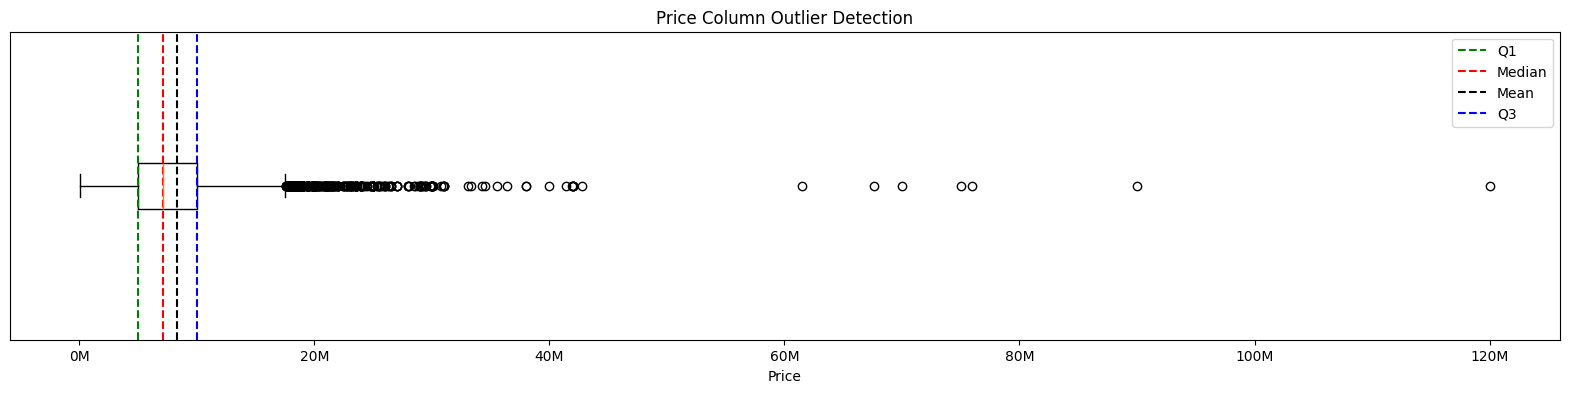

In [34]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['price'],
    vert=False
)
plt.title('Price Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000000)}M')))
plt.gca().axvline(np.quantile(df_copy['price'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['price'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['price'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['price'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Price')

Based on the **Five-Number Summary** of **price** column, we can detect outliers using the **IQR (Interquartile Range) Method** and **Box Plot**:

- Since the **minimum price is 95,000** (which is above the lower boundary), **no lower outliers** exist.  
- Any price **above 17,518,385.5** is considered an **upper outlier**. The **maximum price is 120,000,000**, which is **far beyond the upper boundary**, confirming significant, so we will delete the values which upper than the **upper boundary = 17,518,385.5**. 

In [35]:
df_copy = df_copy[df_copy['price'] <= 17600000]

**Price Box Plot After Handle Outliers:**

Text(0.5, 0, 'Price')

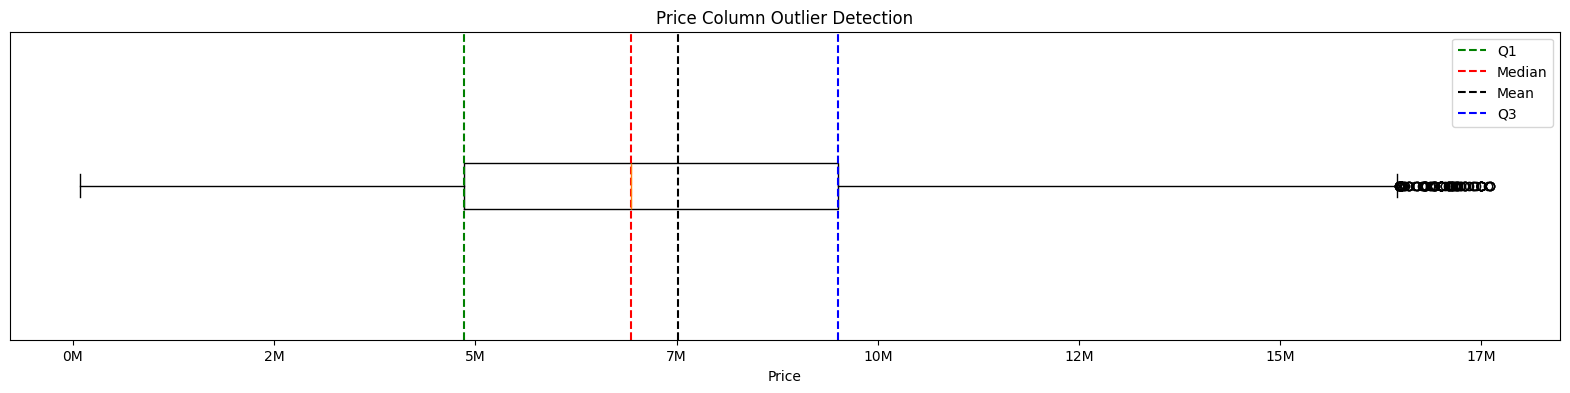

In [36]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['price'],
    vert=False
)
plt.title('Price Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000000)}M')))
plt.gca().axvline(np.quantile(df_copy['price'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['price'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['price'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['price'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Price')

In [37]:
len(df_copy)

7442

In [38]:
handle_outlier(numerical_columns)

Price Five Number Summary:
Price Minimum Value = 95000.0
Price Lower Boundary = -2104468.125
Price Q1 Value = 4858212.75
Price Median (Q2) Value = 6938000.0
Price Mean (Average) Value = 7512768.933619995
Price Q3 Value = 9500000.0
Price Upper Boundary = 16462680.875
Price Maximum Value = 17600000.0
-------------------------------------------------------------------
Area_m2 Five Number Summary:
Area_m2 Minimum Value = 1.0
Area_m2 Lower Boundary = 54.0
Area_m2 Q1 Value = 129.0
Area_m2 Median (Q2) Value = 155.0
Area_m2 Mean (Average) Value = 157.8294813222252
Area_m2 Q3 Value = 179.0
Area_m2 Upper Boundary = 254.0
Area_m2 Maximum Value = 9658.0
-------------------------------------------------------------------
Bedrooms_number Five Number Summary:
Bedrooms_number Minimum Value = 1
Bedrooms_number Lower Boundary = 0.5
Bedrooms_number Q1 Value = 2.0
Bedrooms_number Median (Q2) Value = 3.0
Bedrooms_number Mean (Average) Value = 2.682746573501747
Bedrooms_number Q3 Value = 3.0
Bedrooms_number

**2.8.2. Identifying Outliers in Real Estate Area**  

**Area Box Plot Before Handle Outliers:**

Text(0.5, 0, 'Area')

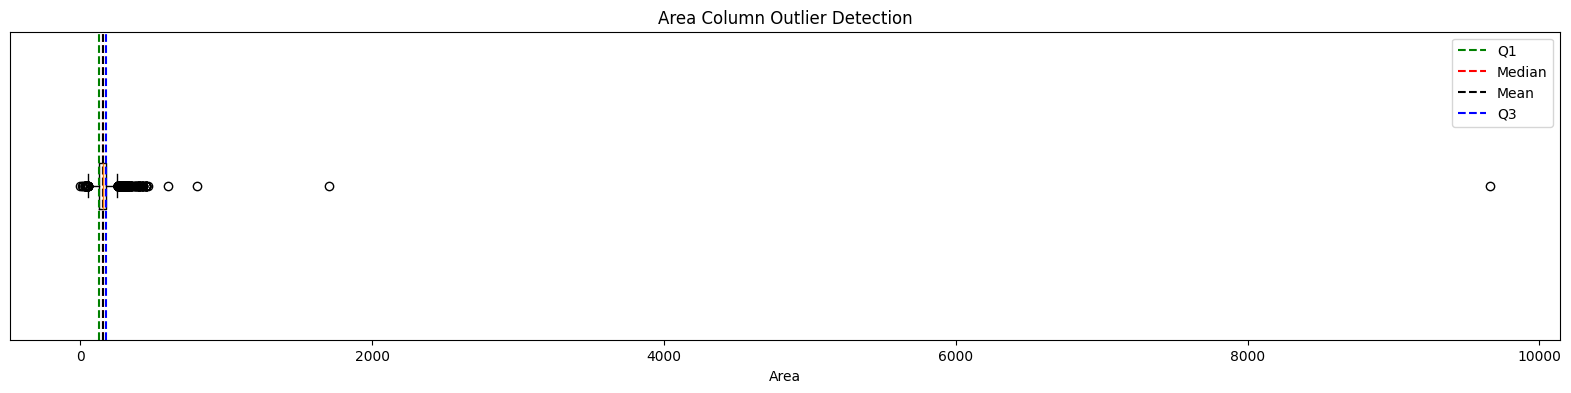

In [39]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['area_m2'],
    vert=False
)
plt.title('Area Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x)}')))
plt.gca().axvline(np.quantile(df_copy['area_m2'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['area_m2'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['area_m2'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['area_m2'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Area')

Based on the **Five-Number Summary** of **area_m2** column, we can detect outliers using the **IQR (Interquartile Range) Method** and **Box Plot**:

- Since the **minimum area is 1 m²** (which is less the lower boundary), values **< 54 m²** are likely invalid values and make the analysis illogical, so we will remove values that are less than the **upper boundary = 54 m²**.  
- Any area **above 254.0 m²** is considered an **upper outlier**. The **maximum area is 9658.0 m2**, which is **far beyond the upper boundary**, confirming significant outliers, so we will delete the values which upper than the **upper boundary = 254 m²**.

In [40]:
df_copy = df_copy[(df_copy['area_m2'] >= 54) & (df_copy['area_m2'] <= 254)]

**Area Box Plot After Handle Outliers:**

Text(0.5, 0, 'Area')

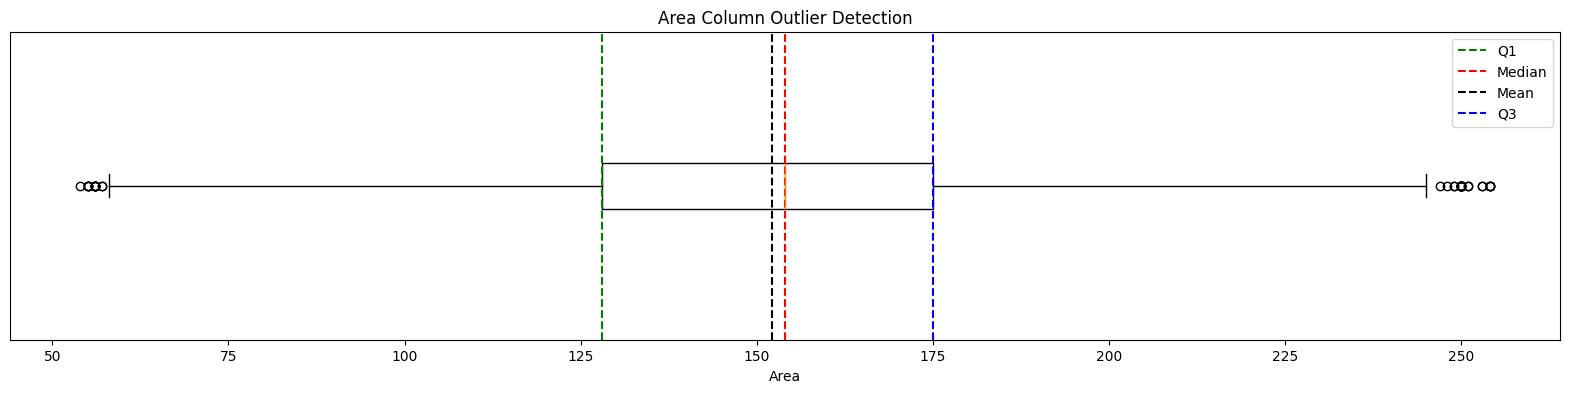

In [41]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['area_m2'],
    vert=False
)
plt.title('Area Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x)}')))
plt.gca().axvline(np.quantile(df_copy['area_m2'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['area_m2'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['area_m2'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['area_m2'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Area')

In [42]:
len(df_copy)

7160

In [43]:
handle_outlier(numerical_columns)

Price Five Number Summary:
Price Minimum Value = 95000.0
Price Lower Boundary = -2100000.0
Price Q1 Value = 4800000.0
Price Median (Q2) Value = 6850000.0
Price Mean (Average) Value = 7450767.069413408
Price Q3 Value = 9400000.0
Price Upper Boundary = 16300000.0
Price Maximum Value = 17600000.0
-------------------------------------------------------------------
Area_m2 Five Number Summary:
Area_m2 Minimum Value = 54.0
Area_m2 Lower Boundary = 57.5
Area_m2 Q1 Value = 128.0
Area_m2 Median (Q2) Value = 154.0
Area_m2 Mean (Average) Value = 152.11438547486034
Area_m2 Q3 Value = 175.0
Area_m2 Upper Boundary = 245.5
Area_m2 Maximum Value = 254.0
-------------------------------------------------------------------
Bedrooms_number Five Number Summary:
Bedrooms_number Minimum Value = 1
Bedrooms_number Lower Boundary = 0.5
Bedrooms_number Q1 Value = 2.0
Bedrooms_number Median (Q2) Value = 3.0
Bedrooms_number Mean (Average) Value = 2.659776536312849
Bedrooms_number Q3 Value = 3.0
Bedrooms_number Upp

**2.8.3. Identifying Outliers in Real Estate Bedrooms Number**  

**Bedrooms Number Box Plot Before Handle Outliers:**

Text(0.5, 0, 'Bedrooms')

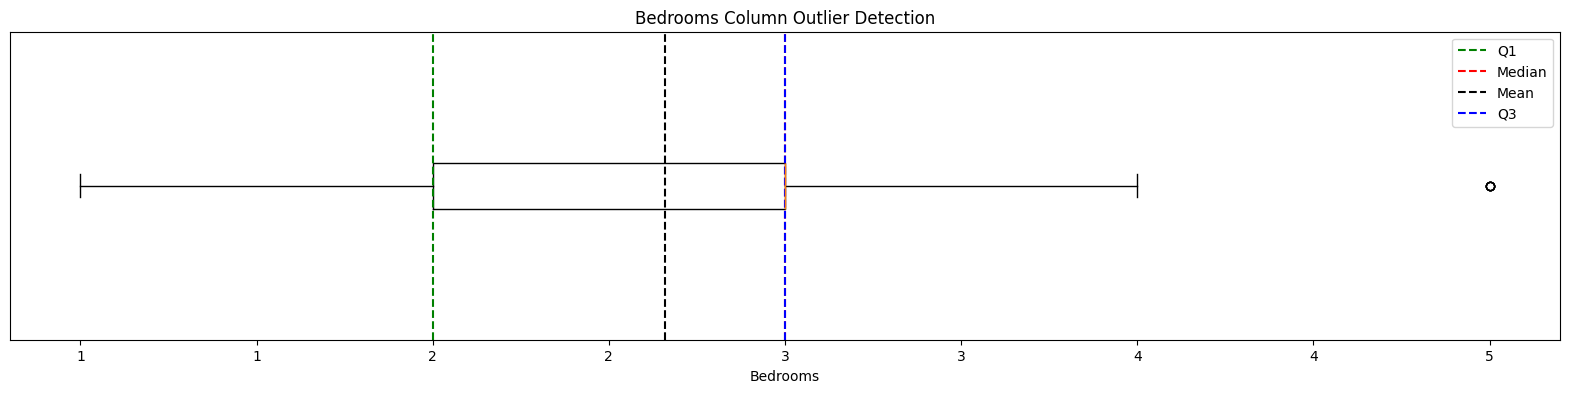

In [44]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['bedrooms_number'],
    vert=False
)
plt.title('Bedrooms Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x)}')))
plt.gca().axvline(np.quantile(df_copy['bedrooms_number'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['bedrooms_number'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['bedrooms_number'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['bedrooms_number'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Bedrooms')

Based on the **Five-Number Summary** of **bedrooms_number** column, we can detect outliers using the **IQR (Interquartile Range) Method** and **Box Plot**:

- Since the **minimum number is 1** (which is above the lower boundary), **no lower outliers** exist.  
- Any numbers **above 4** is considered an **upper outlier**. The **maximum number is 5**, so we will delete the values which upper than the **upper boundary = 4.5**. 

In [45]:
df_copy= df_copy[df_copy['bedrooms_number'] <= 4.5]

In [46]:
len(df_copy)

7155

**Bedrooms Number Box Plot After Handle Outliers:**

Text(0.5, 0, 'Bedrooms')

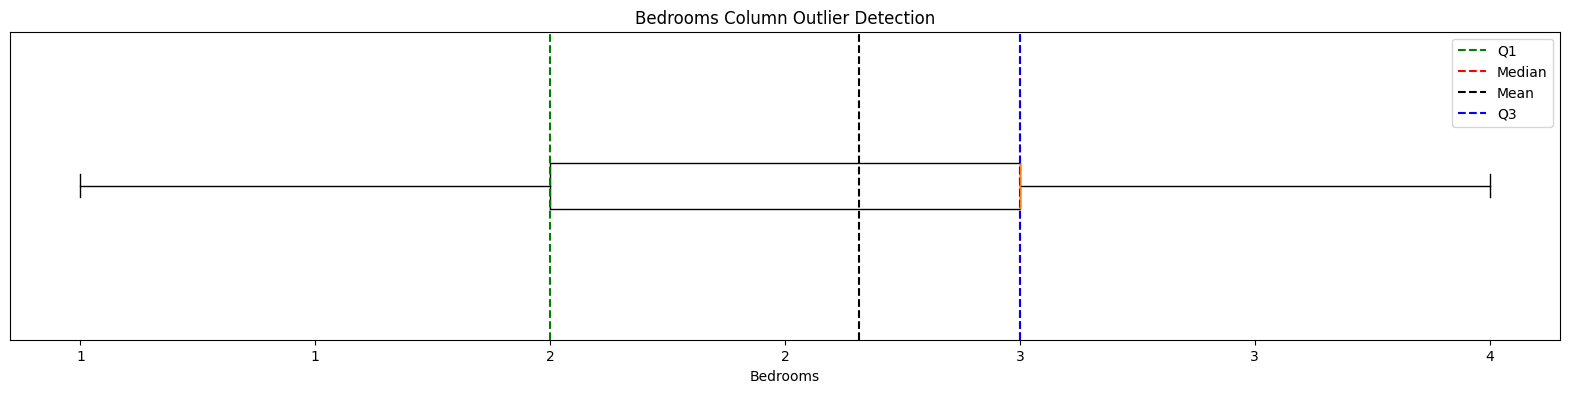

In [47]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['bedrooms_number'],
    vert=False
)
plt.title('Bedrooms Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x)}')))
plt.gca().axvline(np.quantile(df_copy['bedrooms_number'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['bedrooms_number'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['bedrooms_number'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['bedrooms_number'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Bedrooms')

**2.8.4. Identifying Outliers in Real Estate Bathrooms Number**  

In [48]:
handle_outlier(numerical_columns)

Price Five Number Summary:
Price Minimum Value = 95000.0
Price Lower Boundary = -2100000.0
Price Q1 Value = 4800000.0
Price Median (Q2) Value = 6850000.0
Price Mean (Average) Value = 7450104.395108316
Price Q3 Value = 9400000.0
Price Upper Boundary = 16300000.0
Price Maximum Value = 17600000.0
-------------------------------------------------------------------
Area_m2 Five Number Summary:
Area_m2 Minimum Value = 54.0
Area_m2 Lower Boundary = 57.5
Area_m2 Q1 Value = 128.0
Area_m2 Median (Q2) Value = 154.0
Area_m2 Mean (Average) Value = 152.07491264849756
Area_m2 Q3 Value = 175.0
Area_m2 Upper Boundary = 245.5
Area_m2 Maximum Value = 254.0
-------------------------------------------------------------------
Bedrooms_number Five Number Summary:
Bedrooms_number Minimum Value = 1
Bedrooms_number Lower Boundary = 0.5
Bedrooms_number Q1 Value = 2.0
Bedrooms_number Median (Q2) Value = 3.0
Bedrooms_number Mean (Average) Value = 2.6581411600279523
Bedrooms_number Q3 Value = 3.0
Bedrooms_number Up

**Bathrooms Number Box Plot Before Handle Outliers:**

Text(0.5, 0, 'Bathrooms')

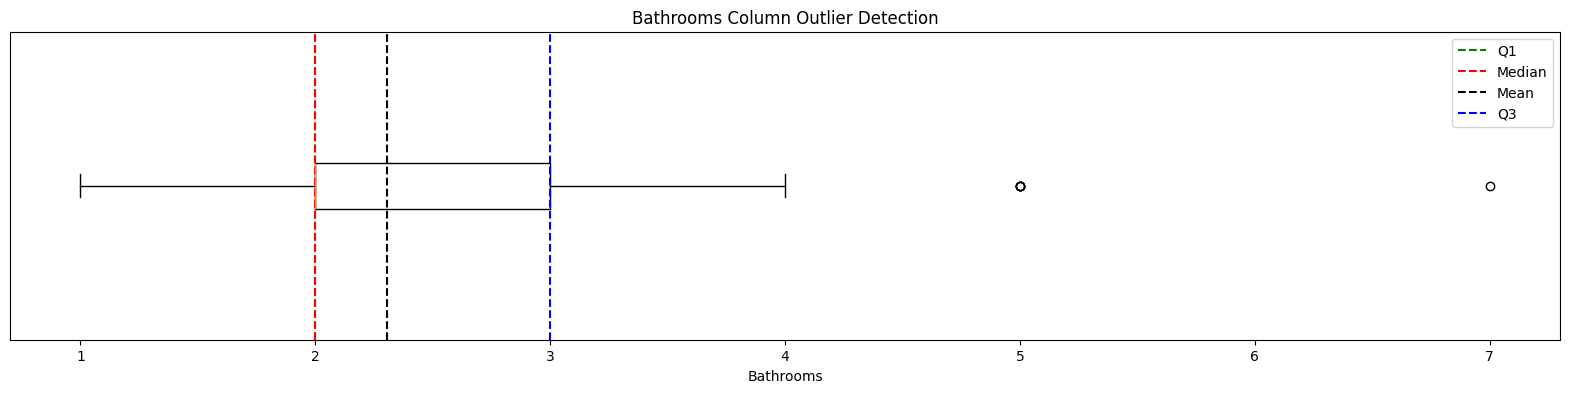

In [49]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['bathrooms_number'],
    vert=False
)
plt.title('Bathrooms Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x)}')))
plt.gca().axvline(np.quantile(df_copy['bathrooms_number'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['bathrooms_number'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['bathrooms_number'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['bathrooms_number'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Bathrooms')

Based on the **Five-Number Summary** of **bathrooms_number** column, we can detect outliers using the **IQR (Interquartile Range) Method** and **Box Plot**:

- Since the **minimum number is 1** (which is above the lower boundary), **no lower outliers** exist.  
- Any numbers **above 4.5** is considered an **upper outlier**. The **maximum number is 7**, so we will delete the values which upper than the **upper boundary = 4.5**. 

In [50]:
df_copy = df_copy[df_copy['bathrooms_number'] <= 4.5]

In [51]:
len(df_copy)

7149

**Bathrooms Number Box Plot After Handle Outliers:**

Text(0.5, 0, 'Bathrooms')

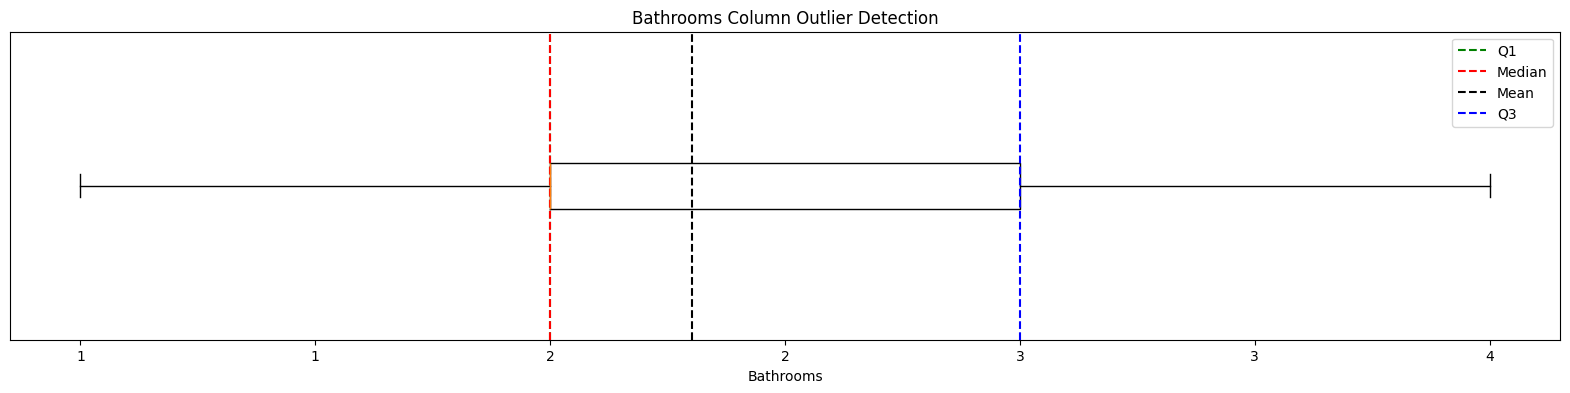

In [52]:
plt.figure(figsize=(20,4))
plt.boxplot(
    df_copy['bathrooms_number'],
    vert=False
)
plt.title('Bathrooms Column Outlier Detection')
plt.yticks([])
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x)}')))
plt.gca().axvline(np.quantile(df_copy['bathrooms_number'], 0.25), linestyle='--', color='green', label='Q1')
plt.gca().axvline(np.quantile(df_copy['bathrooms_number'], 0.50), linestyle='--', color='red', label='Median')
plt.gca().axvline((df_copy['bathrooms_number'].mean()), linestyle='--', color='black', label='Mean')
plt.gca().axvline(np.quantile(df_copy['bathrooms_number'], 0.75), linestyle='--', color='blue', label='Q3')
plt.legend(loc='best')
plt.xlabel('Bathrooms')

### **2.9. Dealing With Null Values:**

In [53]:
df_copy.isnull().sum()

real_estate_type       0
district               0
governorate            0
area_m2                0
bedrooms_number        0
bathrooms_number       0
price                  0
down_payment        3705
dtype: int64

In [54]:
float((df_copy['down_payment'].isnull().sum() / len(df_copy)) * 100) # 51.97444089456869

51.82543013008812

**2.9.1. Remove Column "down_payment" As, a Column with 51% Null Values, But We Will Create a Separate Dataframe For Payment Down Further Analysis:** 

In [55]:
df_copy.drop(
    columns='down_payment',
    inplace=True
)

### **2.10. Derived New Columns:**

**2.10.1. Derived Column "general_district" by Extracting All General Districts From The Dataset To Achieve Data Normalization & Standardization, Which Maps Coded Values To Meaningful, User-Friendly Descriptions:**

**(1) Create General Districts Lists For All Possible General Districts In the Cairo Government:**

In [56]:
district_5th_settlement_list = list(df_copy['district'][df_copy['district'].str.contains('5th Settlement')].unique())
district_1st_settlement_list =list(df_copy['district'][df_copy['district'].str.contains('1st Settlement')].unique())
district_6st_settlement_list =list(df_copy['district'][df_copy['district'].str.contains('6th Settlement')].unique())
district_madinaty_list = list(df_copy['district'][df_copy['district'].str.contains('Madinaty')].unique())
district_mostakbal_list = list(df_copy['district'][df_copy['district'].str.contains('Mostakbal City')].unique())
district_shorouk_list = list(df_copy['district'][df_copy['district'].str.contains('Shorouk')].unique())
district_zamalek_list = list(df_copy['district'][df_copy['district'].str.contains('Zamalek')].unique())
district_zahraa_al_maadi_list = list(df_copy['district'][df_copy['district'].str.contains(' - Zahraa Al Maadi')].unique())
district_mokattam_list = list(df_copy['district'][df_copy['district'].str.contains('Mokattam')].unique())
district_3rd_settlement_list = list(df_copy['district'][df_copy['district'].str.contains('3rd Settlement')].unique())
district_new_capital_list = list(df_copy['district'][df_copy['district'].str.contains('New Capital City')].unique())
district_sheraton_list = list(df_copy['district'][df_copy['district'].str.contains('Sheraton')].unique())
district_new_heliopolis_list = list(df_copy['district'][df_copy['district'].str.contains('New Heliopolis')].unique())
district_nasr_city_list = list(df_copy['district'][df_copy['district'].str.contains('Nasr City')].unique())
district_badr_city_list = list(df_copy['district'][df_copy['district'].str.contains('Badr City')].unique())
district_fostat_city_list = list(df_copy['district'][df_copy['district'].str.contains('El Fostat')].unique())
district_katameya_list = list(df_copy['district'][df_copy['district'].str.contains(' - Katameya')].unique())
district_obour_city_list = list(df_copy['district'][df_copy['district'].str.contains('Obour City')].unique())
district_downtown_cairo_list = list(df_copy['district'][df_copy['district'].str.contains('Downtown Cairo')].unique())
district_nozha_city_list = list(df_copy['district'][df_copy['district'].str.contains('New Nozha')].unique())
district_almazah_city_list = list(df_copy['district'][df_copy['district'].str.contains('Almazah')].unique())
district_garden_city_list = list(df_copy['district'][df_copy['district'].str.contains('Garden City')].unique())
district_almanial_list = list(df_copy['district'][df_copy['district'].str.contains('Al Manial')].unique())
district_boulaq_abo_el_ela_list = list(df_copy['district'][df_copy['district'].str.contains('Boulaq Abo El Ela')].unique())
district_abasiya_list = list(df_copy['district'][df_copy['district'].str.contains('Abasiya')].unique())
district_darb_al_ahmar_list = list(df_copy['district'][df_copy['district'].str.contains('Darb al-Ahmar')].unique())
district_maadi_list = list(df_copy['district'][df_copy['district'].str.contains('- Maadi')].unique())
district_heliopolis_list = list(df_copy['district'][df_copy['district'].str.contains(' - Heliopolis')].unique())
district_rehab_list = list(df_copy['district'][df_copy['district'].str.contains('Rehab City Compound')].unique())

In [57]:
district_heliopolis_list.append('Heliopolis')
district_maadi_list.append('Maadi')
district_zahraa_al_maadi_list.append('Zahraa Al Maadi')

**(2) Create A Function "districts_standarization" To Retrive General District From "district" Column Using "apply" Function:**

In [58]:
def districts_standarization(district_column):
    for region in district_1st_settlement_list:
        if district_column.strip() == region.strip():
            return '1st settlement'
    
    for region in district_5th_settlement_list:
        if district_column.strip() == region.strip():
            return '5th settlement'
            
    for region in district_6st_settlement_list:
        if district_column.strip() == region.strip():
            return '6th settlement'
            
    for region in district_madinaty_list:
        if district_column.strip() == region.strip():
            return 'Madinaty'
            
    for region in district_mostakbal_list:
        if district_column.strip() == region.strip():
            return 'Mostakbal City'
            
    for region in district_shorouk_list:
        if district_column.strip() == region.strip():
            return 'Shorouk City'
            
    for region in district_zamalek_list:
        if district_column.strip() == region.strip():
            return 'Zamalek'
            
    for region in district_zahraa_al_maadi_list:
        if district_column.strip() == region.strip():
            return 'Zahraa Al Maadi'
        
    for region in district_maadi_list:
        if district_column.strip() == region.strip():
            return 'Maadi'
        
    for region in district_mokattam_list:
        if district_column.strip() == region.strip():
            return 'Mokattam'
            
    for region in district_3rd_settlement_list:
        if district_column.strip() == region.strip():
            return '3rd settlement'
            
    for region in district_new_capital_list:
        if district_column.strip() == region.strip():
            return 'New Capital City'
            
    for region in district_sheraton_list:
        if district_column.strip() == region.strip():
            return 'Sheraton'
            
    for region in district_new_heliopolis_list:
        if district_column.strip() == region.strip():
            return 'New Heliopolis'
        
    for region in district_heliopolis_list:
        if district_column.strip() == region.strip():
            return 'Heliopolis'
            
    for region in district_nasr_city_list:
        if district_column.strip() == region.strip():
            return 'Nasr City'
            
    for region in district_badr_city_list:
        if district_column.strip() == region.strip():
            return 'Badr City'
            
    for region in district_fostat_city_list:
        if district_column.strip() == region.strip():
            return 'El Fostat'
            
    for region in district_katameya_list:
        if district_column.strip() == region.strip():
            return 'Katameya'
            
    for region in district_obour_city_list:
        if district_column.strip() == region.strip():
            return 'Obour City'
            
    for region in district_downtown_cairo_list:
        if district_column.strip() == region.strip():
            return 'Downtown Cairo'
            
    for region in district_nozha_city_list:
        if district_column.strip() == region.strip():
            return 'New Nozha'
            
    for region in district_almazah_city_list:
        if district_column.strip() == region.strip():
            return 'Almazah'
            
    for region in district_garden_city_list:
        if district_column.strip() == region.strip():
            return 'Garden City'
            
    for region in district_almanial_list:
        if district_column.strip() == region.strip():
            return 'Al Manial'
            
    for region in district_boulaq_abo_el_ela_list:
        if district_column.strip() == region.strip():
            return 'Boulaq Abo El Ela'
            
    for region in district_abasiya_list:
        if district_column.strip() == region.strip():
            return 'Abasiya'
            
    for region in district_darb_al_ahmar_list:
        if district_column.strip() == region.strip():
            return 'Darb Al-Ahmar'
           
    for region in district_rehab_list:
        if district_column.strip() == region.strip():
            return 'Rehab City'
        
    else:
        return 'Other'

In [59]:
df_copy['general_district'] = df_copy['district'].apply(districts_standarization)

In [60]:
df_copy['general_district'].nunique()

30

**2.10.2. Derived Column "apartment_configuration" To Analyze the Most Common Configuration Repetitions In The Dataset:**

In [61]:
df_copy['apartment_configuration'] = df_copy['bedrooms_number'].astype('string') + ' - ' + df_copy['bathrooms_number'].astype('string')

**2.10.3. Derived Column "bathroom_bedroom_ratio" To Calculate The Average Bathrooms Per Bedroom For The Entire Dataset:**

In [62]:
df_copy['bathroom_bedroom_ratio'] = (df_copy['bathrooms_number'] / df_copy['bedrooms_number']).round(2)

**2.10.4. Derived Column "price_pr_sq_m_2" To Identify The Most nad Least Expensive Neighborhoods In The Dataset:**

In [63]:
df_copy['price_per_sq_m_2'] = (df_copy['price'] / df_copy['area_m2']).round(2) 

In [64]:
df_copy.to_csv('cleaned_bayut_egypt.csv', index=False)